# 1. TOPIC - SMS Spam Detection

-   Spam text or messages are unwanted and annoying to us. Often people get deceived by scammers who send fraudulent messages. With the help of machine learning algorithms, effective approaches are made to identify and filter spam messages.

##  2. Goal 
-  The goal of the project is to classify sms messages into  spam or ham by using several supervised machine learning techniques such as logistic regression, support vector classifier and naive bayes models. SMOTE techniques will be used to balance the data and evaluate the performance of models. Compate the results of imbalanced and balanced data and see if there is any improvement. 

## 3. Data 
### The dataset is obtained from UCI machine learning repository https://archive.ics.uci.edu/dataset/228/sms+spam+collection

-   The dataset is a collection of 5574 SMS messages collected for research purposes.This is a natural language processing(NLP) classification technique.

### Attributes:    
**1. Text**  
**2. Label(spam/ham)**



## Python Libraries

In [1]:
# install libraries
import numpy as np
import pandas as pd 
import string 
import re 

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling libraries
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,precision_score, recall_score,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score,KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [2]:
# Natural language tool kit
#!pip install nltk
import nltk
#nltk.download('punkt')
import nltk.corpus
#nltk.download('stopwords')
from nltk.corpus import stopwords

## Read the data

In [3]:
data = pd.read_csv('SMS_Spam.csv')
data.head()

,Column1,Column2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.sample(10)

,Column1,Column2
3134,ham,So no messages. Had food?
1444,spam,Free 1st week entry 2 TEXTPOD 4 a chance 2 win...
1715,ham,Yeah I don't see why not
3645,ham,* Thought I didn't see you.
5118,ham,Thanks. Fills me with complete calm and reassu...
1829,ham,May i call You later Pls
1768,ham,"K, want us to come by now?"
2091,ham,S:-)kallis wont play in first two odi:-)
3336,ham,"Sorry, got a late start, we're on the way"
5287,spam,URGENT! You have won a 1 week FREE membership ...


## 4. Data Description

In [5]:
# Dimensions- size of the data
data.shape

(5574, 2)

In [6]:
# Information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  5574 non-null   object
 1   Column2  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# Descriptive Statistics gives summary of each attribute in the dataset
data.describe()

,Column1,Column2
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


## 5. Data Cleaning 
-   The quality of the data should be checked before we apply machine learning algorithms to improve computational time. This process makes our data suitable for further analysis such as visualizations and model building.

In [8]:
# Renaming the columns for easy interpretation
data.rename(columns = {'Column1' :'Label' , 'Column2':'Text'}, inplace =True)
data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Checking for missing data
data.isna().sum()

Label    0
Text     0
dtype: int64

In [10]:
# Checking for null values
data.isnull().sum()

Label    0
Text     0
dtype: int64

In [11]:
# Checking for duplicates
data.duplicated().sum()

403

-   403 duplicate entries are identified and removed

In [12]:
# Removing duplicated values 
data = data.drop_duplicates(keep = 'first')
# recheck for duplicates
data.duplicated().sum()

0

In [13]:
#reduced data size
data.shape

(5171, 2)

## 6. Exploratory Data Analysis

In [14]:
np.unique(data['Label'])

array(['ham', 'spam'], dtype=object)

In [15]:
# Lets check how many labels of data are 'spam' and 'ham'
data['Label'].value_counts()

ham     4518
spam     653
Name: Label, dtype: int64

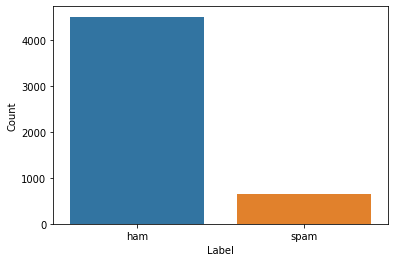

In [16]:
# Visualize Label distribution  
sns.barplot( x = data['Label'].value_counts().index, y = data['Label'].value_counts().values)
plt.xlabel("Label")
plt.ylabel('Count')
plt.show()

-    88% of the labels are ham and only 12% are spam. The ratio of spam to ham is 1:7 which means our data is imbalanced.

In [17]:
# Word count and character count
#data['word_count'] = data['Text'].apply(lambda n: len(n.split()))
data['char_count'] = data['Text'].apply(len)
# word count and sentence count using nltk
data['word_count'] = data['Text'].apply(lambda x : len(nltk.word_tokenize(x)))
data['sent_count'] = data['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [18]:
data.head()

,Label,Text,char_count,word_count,sent_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
# unique sentence count information for visualization purpose
np.unique(data['sent_count'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 17, 18, 38],
      dtype=int64)

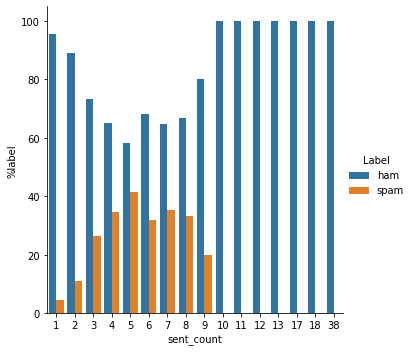

In [20]:
# plot for ham / spam distribution based on sentence count
d = data.groupby('sent_count')['Label'].value_counts(normalize=True).mul(100).rename('%label').reset_index()
p1 = sns.catplot(x = 'sent_count',y = '%label', hue='Label',kind='bar', data=d)
plt.show()

-   From the above plot, all the spam messages are found to be short messages with less than 10 sentences per text. 

In [21]:
# Statistics of new columns
data[['word_count','char_count','sent_count']].describe()

,word_count,char_count,sent_count
count,5171.000000,5171.000000,5171.000000
mean,18.585767,79.311739,1.973699
std,13.379007,58.322586,1.458811
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,61.000000,1.000000
75%,26.000000,119.000000,2.000000
max,220.000000,910.000000,38.000000


In [22]:
# Statistics of new columns when Label is spam
data[data['Label'] == 'spam'][['word_count','char_count','sent_count']].describe()

,word_count,char_count,sent_count
count,653.000000,653.000000,653.000000
mean,27.762634,137.704441,2.986217
std,6.993008,29.821348,1.494815
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,148.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,223.000000,9.000000


In [23]:
# Statistics of new columns when Label is ham
data[data['Label'] == 'ham'][['word_count','char_count','sent_count']].describe()

,word_count,char_count,sent_count
count,4518.000000,4518.000000,4518.000000
mean,17.259407,70.872067,1.827357
std,13.560301,56.575000,1.394138
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,53.000000,1.000000
75%,22.000000,91.000000,2.000000
max,220.000000,910.000000,38.000000


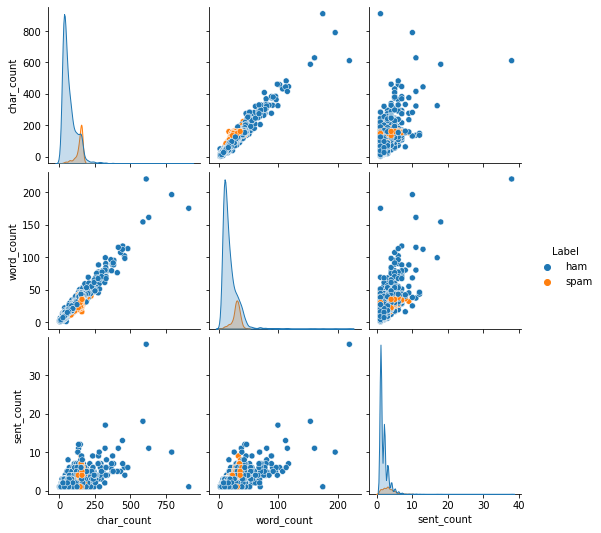

In [24]:
# pairplot
sns.pairplot(data, hue='Label')

<AxesSubplot:>

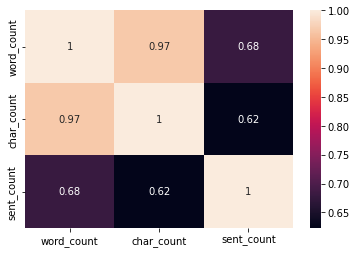

In [25]:
# Correlation matrix
sns.heatmap(data[['word_count','char_count','sent_count']].corr(), annot = True)

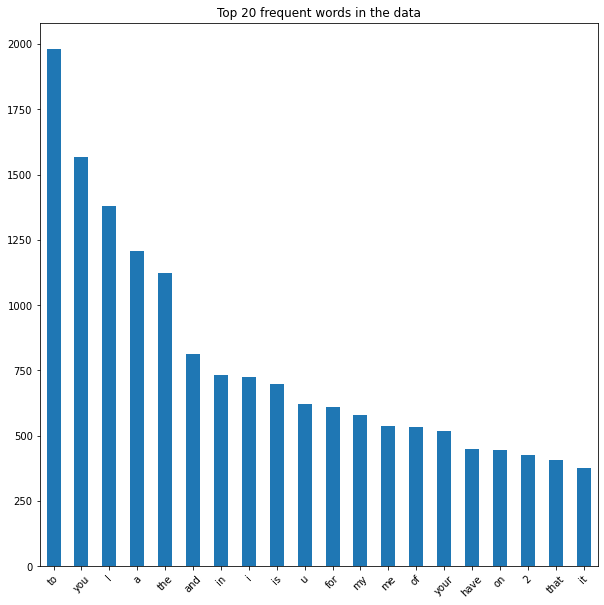

In [26]:
# Top frquent words in the raw dataset
plt.figure(figsize=(10,10))
words = ' '.join(data['Text']).split()
w_freq = pd.Series(words).value_counts()
#print(w_freq.head(20))
w_freq.head(20).plot(kind='bar')
plt.title("Top 20 frequent words in the data")
plt.xticks(rotation = 45)
plt.show()

-   The high frequency words in the ablove plot gives no information about spam. So we will clean the text in the next step.

## Data Pre-Processing 
-   Pre-Processing is an important phase in text processing. If the text contains a mix of uppercase and lowercase words data analysis becomes difficult. 
-   To avoid that we will convert all the text into lowercase. 
-  Punctuation or special characters which confuse the ML models should be removed. 
-   A lot of common words called "stopwords" such as "a, an, the, is, at,on, my, etc"  would not contribute much to data analysis and thus can be removed.
-   Most of the spam messages contain number which may be prize money or deals discounts etc. Hence numbers were not removed here.

In [27]:
import re
stop_words = stopwords.words('english')

def preprocess(text):
    
    # convert to lower case
    clean_text = text.lower()
    
    # Remove special characters
    clean_text=re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", clean_text)
    
    # Remove stopwords and punctuations
    clean_text = " ".join([w for w in clean_text.split() if w not in stop_words and w not in string.punctuation] )
    
    return clean_text

    
data['Clean_Text'] = data['Text'].apply(preprocess)
data['new_wc'] = data['Clean_Text'].apply(lambda n: len(n.split()))
data.head()    

,Label,Text,char_count,word_count,sent_count,Clean_Text,new_wc
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...,23
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goes usf lives around though,8


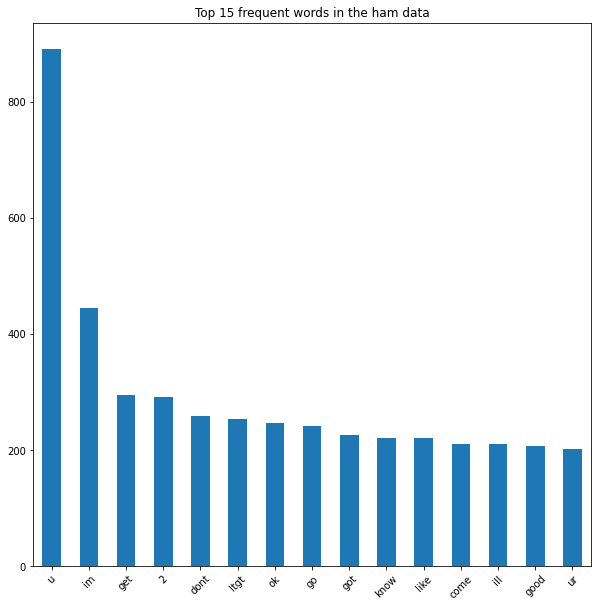

In [28]:
# ham data frequency words plot
ham_df = data[data['Label'] == 'ham']
plt.figure(figsize=(10,10))
words = ' '.join(ham_df['Clean_Text']).split()
w_freq = pd.Series(words).value_counts()
#print(w_freq.head(15))
w_freq.head(15).plot(kind='bar')
plt.title("Top 15 frequent words in the ham data")
plt.xticks(rotation = 45)
plt.show()

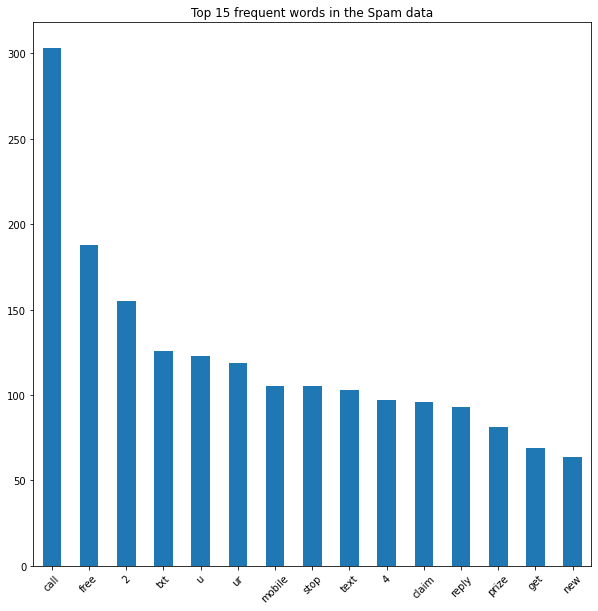

In [29]:
# Spam data frequency words plot
spam_df = data[data['Label'] == 'spam']
plt.figure(figsize=(10,10))
words = ' '.join(spam_df['Clean_Text']).split()
w_freq = pd.Series(words).value_counts()
#print(w_freq.head(15))
w_freq.head(15).plot(kind='bar')
plt.title("Top 15 frequent words in the Spam data")
plt.xticks(rotation = 45)
plt.show()

### Discussions: 
-  After preprocessing the data, we can now see the top frequent words in spam messages and ham messages in the above plots which will give us an idea of which words occur  more often  in spam messages. 'call', 'free' , 'claim', 'prize' are some of the words frequently occuring in spam messages.

## Data Split

In [30]:
#! pip install imbalanced-learn

In [31]:
# Split the data into 80/20 train and test sets.
X = data['Clean_Text']
y = data['Label'].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20 , random_state =1234, shuffle = True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4136,)
(1035,)
(4136,)
(1035,)


## Feature Extraction
-   After the data is cleaned, it should be converted into numerical fromat for machine to understand. This is called feature extraction of text data. Here we will be using TF-IDF vectorizer. 
-   By using TfidfVectorizer, we consider overall weightage of a word by measuring how often they appear in the sms messages.The words with higher scores of weight are deemed to be more significant. We will now apply tfidfvectorizer to the cleaned data.

In [33]:
# TFidf vectorizer 
tfidf = TfidfVectorizer(max_df = 0.95 ,min_df = 2, stop_words = 'english')
#max_features= 2500  #max_features= 3000  #max_features= 4500

# Vectorize the train data with tf-idf
X_tr = tfidf.fit_transform(X_train).toarray()

# Vectorize the test data with tf-idf
X_te = tfidf.transform(X_test).toarray()
print(X_tr.shape)
print(X_te.shape)

(4136, 3005)
(1035, 3005)


## 7. Model building and Evaluation

-   Here we will focus on binary classification algorithmns such as:  
 **1. Logistic Regression**     
 **2.Support vector Classifier**  
 **3. Naive Bayes- Gaussian, Multinomila, Bernoulli and Complement**  

In [34]:
# Train and evaluate different regression models 

def train_and_test_models(X_train, X_test, y_train, y_test):
    
    # Initialize different regression models
    models = [
               ("Logistic Regression",   LogisticRegression()),
               ("Support Vector Classifier",  SVC()), 
               ("Gaussian Naive Bayes",  GaussianNB()),
               ("Multinomial Naive Bayes",  MultinomialNB()),
               ("Bernoulli Naive Bayes",  BernoulliNB()),
               ("Complement Naive Bayes",  ComplementNB())
              ]
    
    # Create lists to store the results
    model_names = []
    tr_acc_values=[]
    accuracy_values = []
    precision_values = []    
    recall_values = []
    f1_values = []
    
               
    # Fit and evaluate each model
    for model_name, model in models:
        
        # fit model on train data
        model.fit(X_train, y_train)               
        
        #predict on test data
        y_pred = model.predict(X_test)
        
        #print(model_name,":\n",classification_report(y_test,y_pred))
        #print("-------------------------------------------------------------")
 
        # compute performance scores of test set
        acc =  accuracy_score(y_test, y_pred)
        pre =  precision_score(y_test, y_pred, average='weighted')
        rec =  recall_score(y_test, y_pred, average='weighted')
        f1 =   f1_score(y_test, y_pred, average='weighted')
       
        
        model_names.append(model_name)
        tr_acc_values.append(model.score(X_train, y_train)) 
        accuracy_values .append(acc)
        precision_values.append(pre)   
        recall_values.append(rec)
        f1_values.append(f1)
                
        metrics_df=pd.DataFrame({
            'Model': model_names,
            'Train_acc' :np.round(tr_acc_values,2) ,                    
            'Accuracy' :np.round(accuracy_values,2),
            'Precision': np.round(precision_values,2),
            'Recall': np.round(recall_values,2),
            'F1' : np.round(f1_values,2),
           
        })
    return metrics_df

In [35]:
# Evaluate Performance Metrics of the models with imbalanced data
a = train_and_test_models(X_tr, X_te, y_train,y_test)
a

,Model,Train_acc,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.97,0.97,0.97,0.97,0.97
1,Support Vector Classifier,1.00,0.98,0.98,0.98,0.98
2,Gaussian Naive Bayes,0.90,0.85,0.93,0.85,0.87
3,Multinomial Naive Bayes,0.98,0.98,0.98,0.98,0.98
4,Bernoulli Naive Bayes,0.98,0.98,0.98,0.98,0.98
5,Complement Naive Bayes,0.97,0.94,0.96,0.94,0.95


### Analysis:
-   We have used 6 supervised algorithms in model building.  
-  Logistic Regression and SVC performed well with good scores as shown in the table above.
-   Out of the 4 naive bayes models, gaussian model has a low performance with test score of 0.85.
-  In the next step we will balance the data using SMOTE technique and check the results.

## Synthetic Minority Oversampling Technique (SMOTE) for Imbalanced data
-  Synthetic samples of minority class( in this dataset spam) are generated to address bias issues and improve  perfromance of the classifiers by making more accurate predictions. It helps to overcome overfitting problems.

In [36]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('before:' , counter)
smt = SMOTE()
X_bal, y_bal = smt.fit_resample(X_tr, y_train)
counter = Counter(y_bal)
print('after:', counter)

before: Counter({'ham': 3594, 'spam': 542})
after: Counter({'ham': 3594, 'spam': 3594})


In [37]:
# Imbalanced data results
a

,Model,Train_acc,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.97,0.97,0.97,0.97,0.97
1,Support Vector Classifier,1.00,0.98,0.98,0.98,0.98
2,Gaussian Naive Bayes,0.90,0.85,0.93,0.85,0.87
3,Multinomial Naive Bayes,0.98,0.98,0.98,0.98,0.98
4,Bernoulli Naive Bayes,0.98,0.98,0.98,0.98,0.98
5,Complement Naive Bayes,0.97,0.94,0.96,0.94,0.95


In [38]:
# Balanced data results
train_and_test_models(X_bal, X_te, y_bal,y_test)

,Model,Train_acc,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.97,0.98,0.98,0.98,0.98
1,Support Vector Classifier,0.99,0.97,0.97,0.97,0.97
2,Gaussian Naive Bayes,0.94,0.85,0.93,0.85,0.88
3,Multinomial Naive Bayes,0.98,0.96,0.97,0.96,0.96
4,Bernoulli Naive Bayes,0.98,0.98,0.98,0.98,0.98
5,Complement Naive Bayes,0.98,0.96,0.97,0.96,0.96


## Analysis
-  Balancing the data and model evaluation only improved the train score of gaussian naive bayes classifier from 0.90 to 0.94. 
-  There is no significant change in other models scores.
-   Next step is to perform hyperparameter tuning using grid search on gaussian naive bayes to see if there is an improvement in model perfromance

## Hyperparameter Tune Gaussian Naive Bayes using GridSearchCV

In [39]:
# Grid Search Cv
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_bal, y_bal)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.008111308307896872}

In [40]:
gs_NB.best_score_

0.9599335270997085

In [41]:
gnb = GaussianNB(var_smoothing = 0.01)
model_gnb = gnb.fit(X_bal, y_bal)
y_pred = model_gnb.predict(X_te)
print('train_score = ', np.round(model_gnb.score(X_bal, y_bal),2))
print('test_score = ' , np.round(model_gnb.score(X_te, y_test),2))
print(classification_report(y_test,y_pred))

train_score =  0.98
test_score =  0.92
              precision    recall  f1-score   support

         ham       0.99      0.92      0.96       924
        spam       0.59      0.95      0.73       111

    accuracy                           0.92      1035
   macro avg       0.79      0.93      0.84      1035
weighted avg       0.95      0.92      0.93      1035



## Let's try with a random text

In [56]:
demo = [" Congrats! You have won $1000,the IRS is trying to contact you to claim your prize, you have a refund coming or asking you to verify your bank account.",
        "Hey Buddy! Let's have dinner at chipotle this weekend.I want you to pay the bill this time"]

In [57]:
demo_fe = tfidf.transform(demo).toarray()
model_gnb.predict(demo_fe)

array(['spam', 'ham'], dtype='<U4')

In [58]:
lg = LogisticRegression()
model_lg = lg.fit(X_bal, y_bal)
model_lg.predict(demo_fe)

array(['spam', 'ham'], dtype=object)

In [59]:
svc= SVC()
model_svc = svc.fit(X_bal, y_bal)
model_svc.predict(demo_fe)

array(['spam', 'ham'], dtype=object)

In [60]:
mnb= MultinomialNB()
model_mnb = mnb.fit(X_bal, y_bal)
model_mnb.predict(demo_fe)

array(['spam', 'ham'], dtype='<U4')

In [61]:
bnb = BernoulliNB()
model_bnb = bnb.fit(X_bal, y_bal)
model_bnb.predict(demo_fe)

array(['spam', 'ham'], dtype='<U4')

In [62]:
cnb =ComplementNB()
model_cnb = cnb.fit(X_bal, y_bal)
model_cnb.predict(demo_fe)

array(['spam', 'ham'], dtype='<U4')

## 8. Results & Analysis
-   The scores of gaussian naive bayes model improved significantly after parameter tuning.


 |Model| train_acc | test_acc | Precision |Recall  |   F1     |
|:-------: |:--------:|:--------:|:--------:|:--------:|:--------:|
|Imbalanced  |0.90   | 0.85   |  0.93   |0.85|0.87|
|Balanced  |0.94	|0.85|	0.93|	0.85	|0.88|
|Tuned model |  0.98   |  0.93   |  0.95   |   0.93  |    0.93|
				
                
-  Final comparison of model scores
|Model| train_acc | test_acc | Precision |Recall  |   F1     |
|:-------: |:--------:|:--------:|:--------:|:--------:|:--------:|
|Logistic regression  |0.97	|0.98|	0.98	|0.98	|0.98|
|SVC |0.99|	0.97|	0.97|	0.97	|0.97|
|Gaussian NB |  0.98   |  0.93   |  0.95   |   0.93  |    0.93|
|Multinomial NB|	0.98|	0.96|	0.96|	0.96	|0.96|
|Bernoulli NB|	0.98|	0.99	|0.99	|0.99	|0.99|
|Complement NB|	0.98|	0.96|	0.96|	0.96	|0.96|

## 9. Discussions and Conclusions

-   The data is trained and tested using supervised models.
-   Used smote technique to address data imbalance.
-   Compared the results of the models.
-   For imbalanced data accuracy scores may not be a good choice of metric due to bias.
-   Hence Precision, recall and F1 scores are chosen to evalute the models performance. 
-   Over all SVC, Naive Bayes performed better.

-   Ways to improve
 -   Time complexity of machine learning models should also be considered an evaluation metric.
 -  Clustering techniques can be used which may increase spam filtering efficiency.

### GitHub Repository Link
https://github.com/ShravaniNK/MachineLearning/blob/main/SpamClassification